ValueError: x and y must have same first dimension, but have shapes (100,) and (10,)

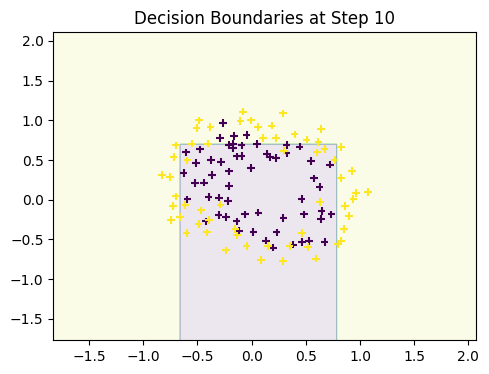

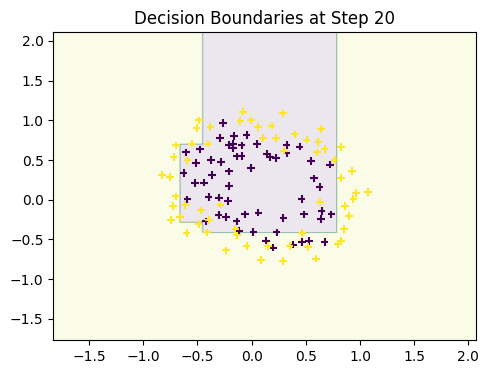

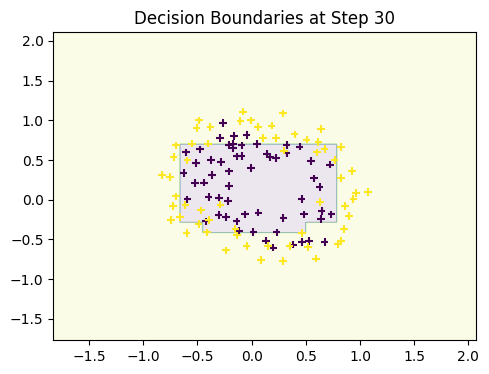

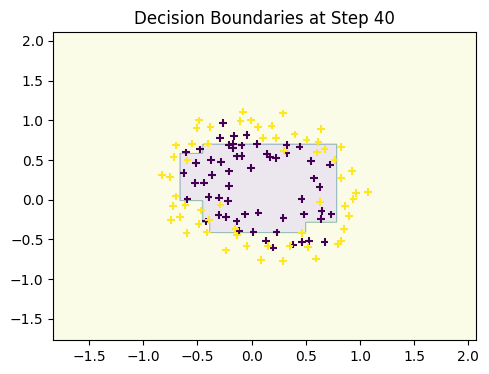

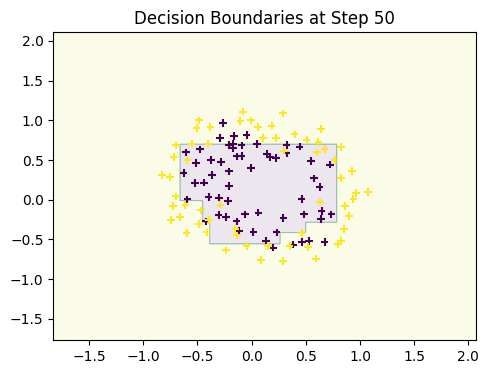

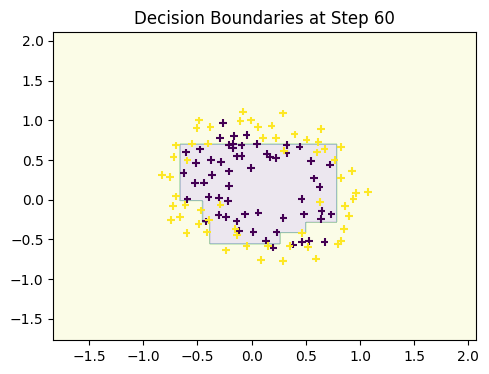

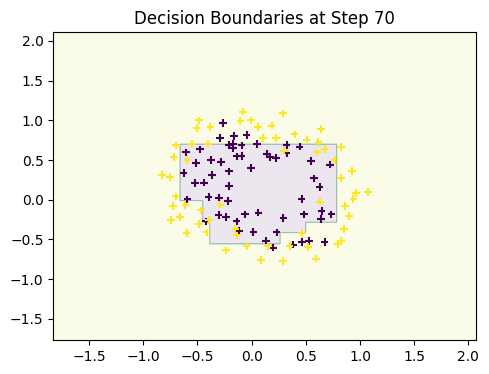

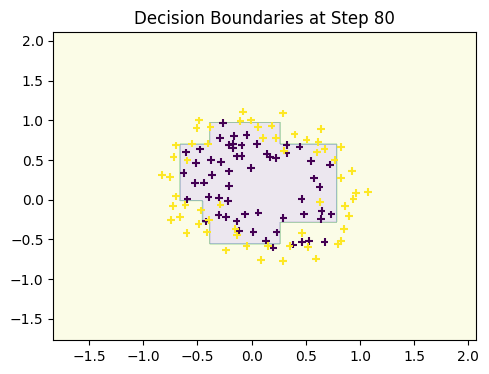

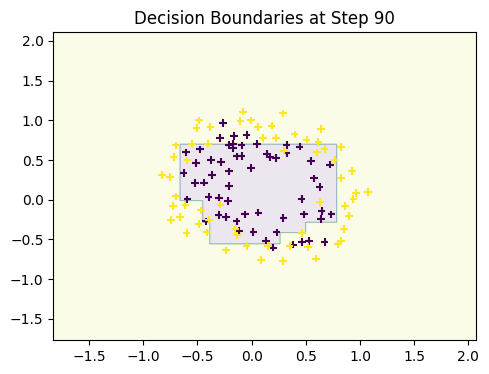

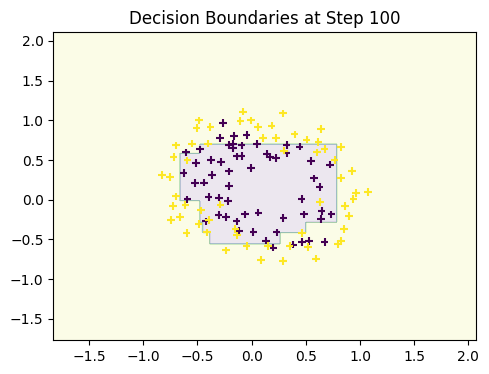

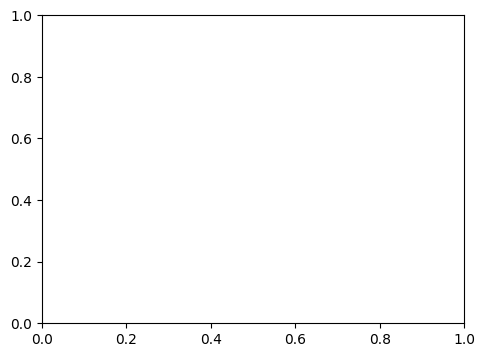

In [189]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load datasets
chips = pd.read_csv('./chips.csv')
geyser = pd.read_csv('./geyser.csv')

def exponential_loss(y_true, raw_scores):
    return np.mean(np.exp(-y_true * raw_scores))

# Function to train AdaBoost and visualize decision boundaries
def train_and_visualize_adaboost(X, y, dataset_name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize AdaBoostClassifier with decision stump as base learner
    adaboost_classifier = AdaBoostClassifier( 
        n_estimators=100,
        algorithm="SAMME",  # SAMME.R for real values
        random_state=42
    )

    # Lists to store accuracy and exponential loss after each boosting step
    accuracies = []
    exp_losses = []

    # Train AdaBoost and visualize decision boundaries
    for n_estimators in range(1, 101):  
        adaboost_classifier.n_estimators = n_estimators
        adaboost_classifier.fit(X_train, y_train)

        # Predictions on the entire space
        xx, yy = np.meshgrid(np.linspace(X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1, 300),
                             np.linspace(X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1, 300))
        Z = adaboost_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        if n_estimators % 10 == 0:
            # Plot decision boundaries
            plt.figure(figsize=(12, 4))
            plt.subplot(1, 2, 1)
            plt.contourf(xx, yy, Z, alpha=0.1)
            plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors='g', marker='+', s=30)
            plt.title(f'Decision Boundaries at Step {n_estimators}')

            # Calculate and store accuracy and exponential loss
            y_pred_train = adaboost_classifier.predict(X_train)
            accuracies.append(accuracy_score(y_train, y_pred_train))

            exp_loss = exponential_loss(y_train, adaboost_classifier.decision_function(X_train))
            exp_losses.append(exp_loss)

    # Plot quality versus step number graph
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 2)
    plt.plot(range(1, 101), accuracies, label='Accuracy', marker='o')
    plt.plot(range(1, 101), exp_losses, label='Exponential Loss', marker='o')
    plt.xlabel('Boosting Step')
    plt.ylabel('Quality')
    plt.title(f'Quality vs. Boosting Step for {dataset_name}')
    plt.legend()
    plt.show()

# Use the classifier on the "chips.csv" dataset
X_chips = chips[['x', 'y']]
y_chips = chips['class'].map({'P': -1, 'N': 1}).values
train_and_visualize_adaboost(X_chips, y_chips, chips)

# Use the classifier on the "geyser.csv" dataset
X_geyser = geyser[['x', 'y']]
y_geyser = geyser['class'].map({'P': -1, 'N': 1}).values
train_and_visualize_adaboost(X_geyser, y_geyser, geyser)


ValueError: x and y must have same first dimension, but have shapes (100,) and (10,)

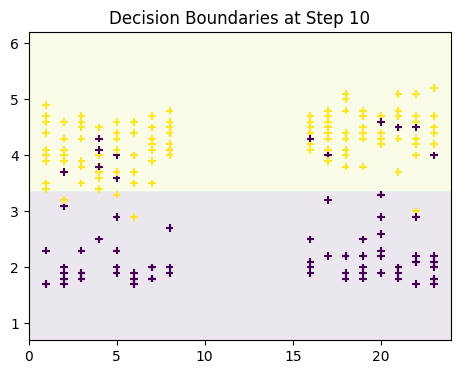

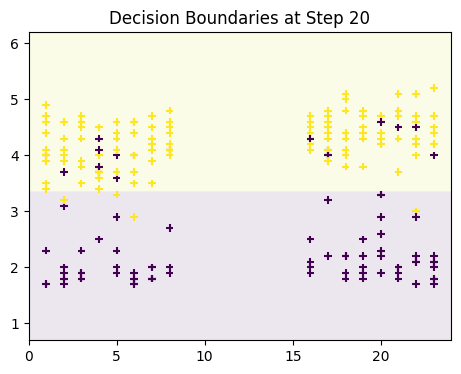

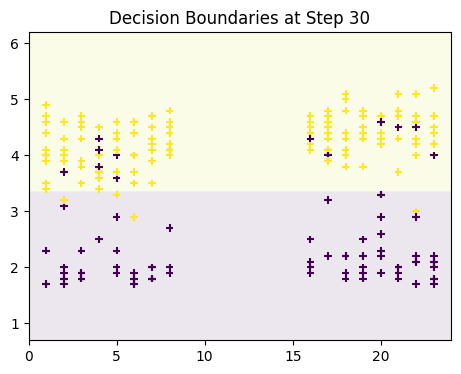

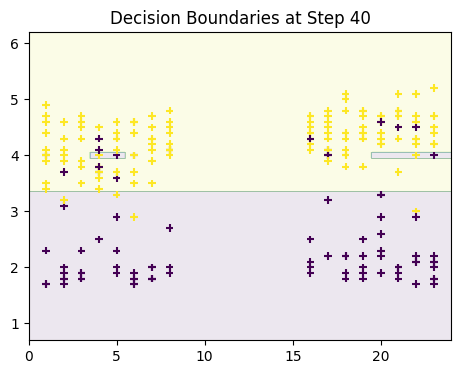

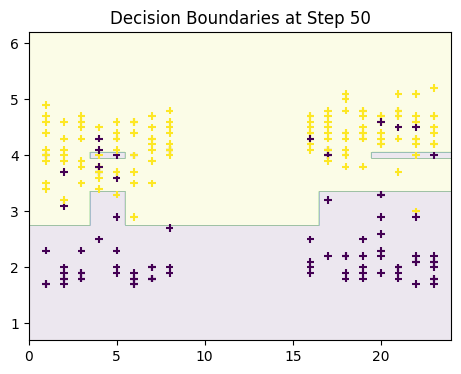

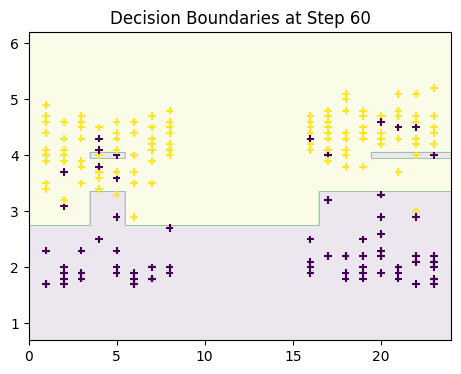

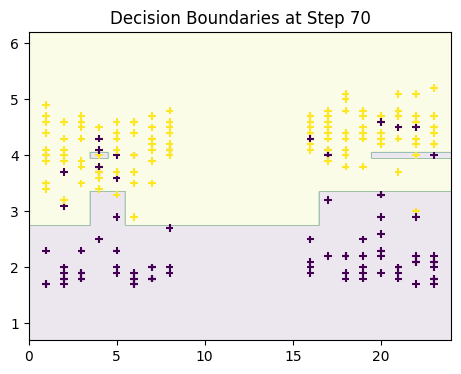

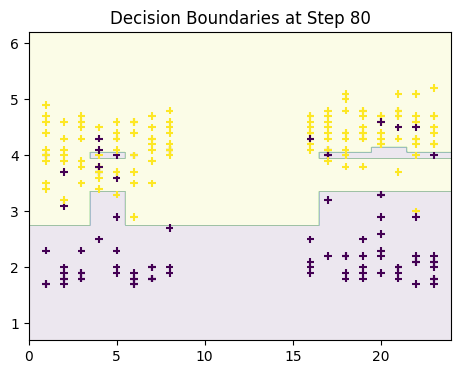

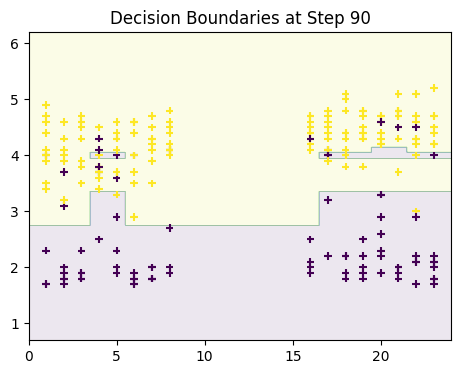

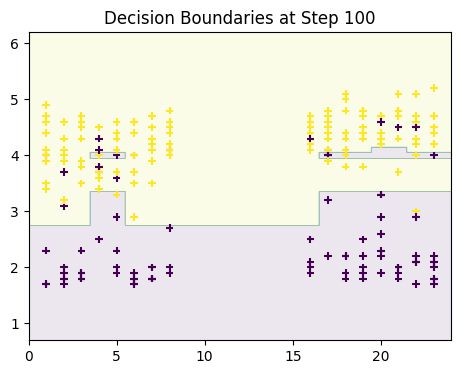

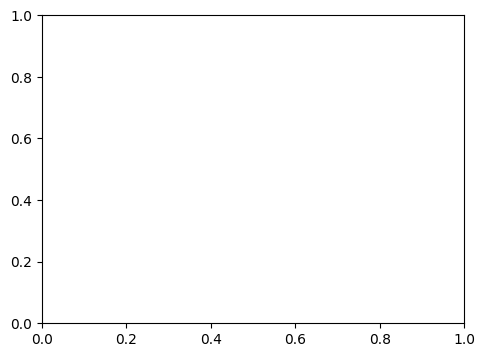

In [190]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load datasets
chips = pd.read_csv('./chips.csv')
geyser = pd.read_csv('./geyser.csv')

def exponential_loss(y_true, raw_scores):
    return np.mean(np.exp(-y_true * raw_scores))

# Function to train AdaBoost and visualize decision boundaries
def train_and_visualize_adaboost(X, y, dataset_name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize AdaBoostClassifier with decision stump as base learner
    adaboost_classifier = AdaBoostClassifier( 
        n_estimators=100,
        algorithm="SAMME",  # SAMME.R for real values
        random_state=42
    )

    # Lists to store accuracy and exponential loss after each boosting step
    accuracies = []
    exp_losses = []

    # Train AdaBoost and visualize decision boundaries
    for n_estimators in range(1, 101):  
        adaboost_classifier.n_estimators = n_estimators
        adaboost_classifier.fit(X_train, y_train)

        # Predictions on the entire space
        xx, yy = np.meshgrid(np.linspace(X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1, 300),
                             np.linspace(X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1, 300))
        Z = adaboost_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        if n_estimators % 10 == 0:
            # Plot decision boundaries
            plt.figure(figsize=(12, 4))
            plt.subplot(1, 2, 1)
            plt.contourf(xx, yy, Z, alpha=0.1)
            plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors='g', marker='+', s=30)
            plt.title(f'Decision Boundaries at Step {n_estimators}')

            # Calculate and store accuracy and exponential loss
            y_pred_train = adaboost_classifier.predict(X_train)
            accuracies.append(accuracy_score(y_train, y_pred_train))

            exp_loss = exponential_loss(y_train, adaboost_classifier.decision_function(X_train))
            exp_losses.append(exp_loss)

    # Plot quality versus step number graph
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 2)
    plt.plot(range(1, 101), accuracies, label='Accuracy', marker='o')
    plt.plot(range(1, 101), exp_losses, label='Exponential Loss', marker='o')
    plt.xlabel('Boosting Step')
    plt.ylabel('Quality')
    plt.title(f'Quality vs. Boosting Step for {dataset_name}')
    plt.legend()
    plt.show()

# Use the classifier on the "geyser.csv" dataset
X_geyser = geyser[['x', 'y']]
y_geyser = geyser['class'].map({'P': -1, 'N': 1}).values
train_and_visualize_adaboost(X_geyser, y_geyser, geyser)
